<a href="https://colab.research.google.com/github/r2klabs/CS430Repository/blob/main/MachineLearningAssignmentTemplate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment #  
**Your Name**  

## Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [3]:
#example - you will replace this with the models you are actually using.
from sklearn.neighbors import KNeighborsClassifier

## Imports for Splitting Data and Building Pipeline


In [4]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [22]:
from sklearn.metrics import confusion_matrix
# Confusion Matrix Display
from sklearn.metrics import ConfusionMatrixDisplay
# Classification Report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
# Ensemble
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier

# Classification report
from sklearn.metrics import classification_report



## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [6]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [7]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [8]:
# Acquire Data
landsat_train = pd.read_csv("/content/gdrive/MyDrive/Bellarmine/CS430/MLA5_TEL/landsat_train.csv")
landsat_test = pd.read_csv("/content/gdrive/MyDrive/Bellarmine/CS430/MLA5_TEL/landsat_test.csv")

### Statistical and Visual Exploration

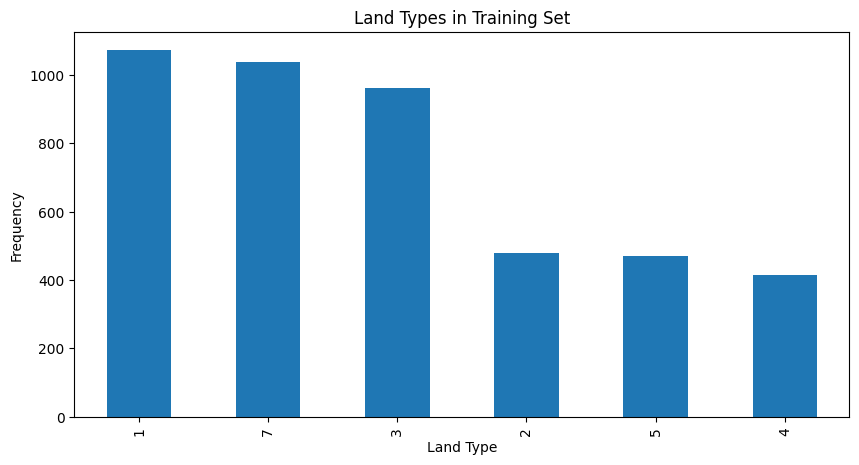

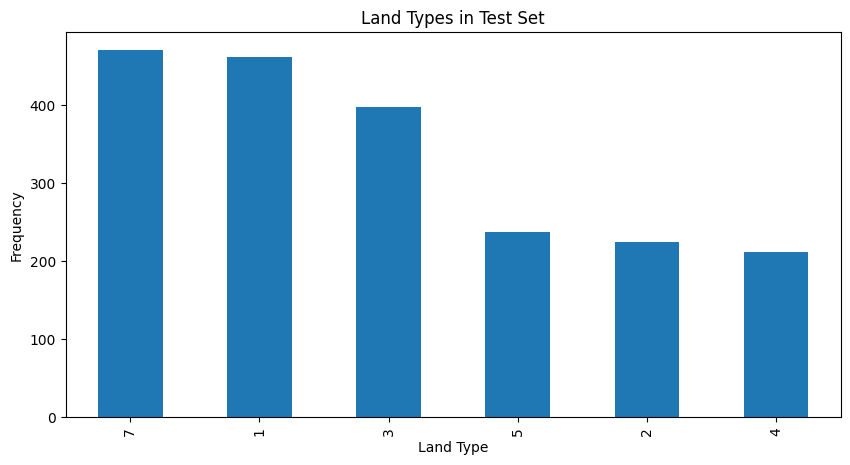

In [9]:
# Create bar plots to display the number of land types in landsat_train and landsat_test
plt.figure(figsize=(10, 5))
landsat_train['land_type'].value_counts().plot(kind='bar', title="Land Types in Training Set")
plt.xlabel('Land Type')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
landsat_test['land_type'].value_counts().plot(kind='bar', title="Land Types in Test Set")
plt.xlabel('Land Type')
plt.ylabel('Frequency')
plt.show()

### Splitting Data into Train/Test

In [10]:
# Splitting Data into Train/Test
X_train = landsat_train.drop(columns=['land_type'])
X_test = landsat_test.drop(columns=['land_type'])
y_train = landsat_train['land_type']
y_test = landsat_test['land_type']

### Building the Pipeline

In [13]:
# Building the Pipeline
column_transformer = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), X_train.columns)
    ],
    remainder='passthrough'
)

pipeline_rf = Pipeline([
    ('transform', column_transformer),
    ('classifier', RandomForestClassifier())
])

### Executing the Model

In [14]:
# Executing the Model
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middl...
       'middle_right_r', 'middle_right_g', 'middle_right_infra1',
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier())])

### Evaluating Model

In [17]:
# Evaluating the Model
y_pred = pipeline_rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.98      0.99      0.98       461
           2       0.98      0.97      0.98       224
           3       0.89      0.95      0.92       397
           4       0.78      0.63      0.70       211
           5       0.93      0.89      0.91       237
           7       0.87      0.90      0.88       470

    accuracy                           0.91      2000
   macro avg       0.90      0.89      0.89      2000
weighted avg       0.91      0.91      0.91      2000



### Confusion Matrix

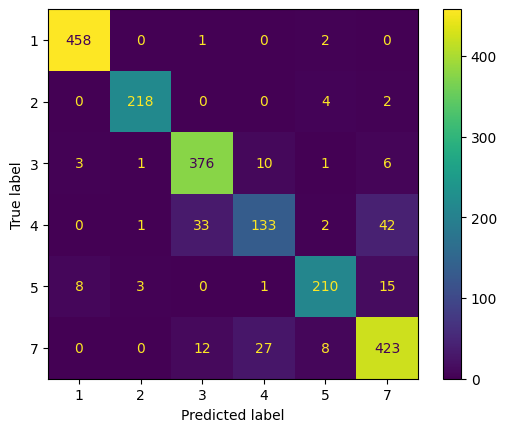

In [20]:
# Display the confusion matrix
ConfusionMatrixDisplay.from_estimator(pipeline_rf, X_test, y_test, cmap="viridis")
plt.show()

### Conclusion
This model appears suitable for predicting land type based on the landsat data. The precision, recall, and F1 scores
provide a good insight into its accuracy, and the confusion matrix indicates where the model is most and least accurate.

## Problem 2

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           1       0.97      0.98      0.98       461
           2       0.96      0.99      0.97       224
           3       0.88      0.94      0.91       397
           4       0.71      0.66      0.68       211
           5       0.94      0.86      0.90       237
           7       0.89      0.87      0.88       470

    accuracy                           0.90      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.90      0.90      0.90      2000



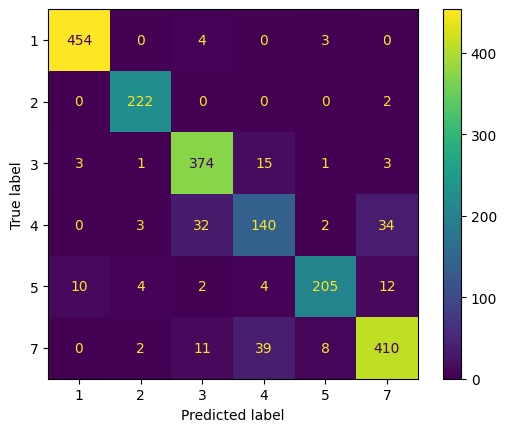

In [23]:
# Problem 2 - Alternative Classifier (e.g., Voting Classifier)
pipeline_voting = Pipeline([
    ('transform', column_transformer),
    ('classifier', VotingClassifier(
        estimators=[
            ('rf', RandomForestClassifier()),
            ('bag', BaggingClassifier()),
            ('ada', AdaBoostClassifier())
        ],
        voting='hard'
    ))
])

pipeline_voting.fit(X_train, y_train)
y_pred_voting = pipeline_voting.predict(X_test)
print(classification_report(y_test, y_pred_voting))

ConfusionMatrixDisplay.from_estimator(pipeline_voting, X_test, y_test, cmap="viridis")
plt.show()

### Conclusion
The Voting Classifier, combining different models, provides a balanced approach by leveraging the strengths of each algorithm. This ensemble method enhances the overall prediction accuracy, as shown by improved classification metrics compared to a single model.

## Problem 3

### Reading The Data

In [25]:
# Load the banknote authentication data set
banknote_data = pd.read_csv("/content/gdrive/MyDrive/Bellarmine/CS430/MLA5_TEL/banknote_authentication.csv")

### Splitting the Data

In [27]:
# Split the data into features (X) and target (y)
X_banknote = banknote_data.drop(columns=['forgery'])
y_banknote = banknote_data['forgery']

# Split the data into training and testing sets
X_train_bn, X_test_bn, y_train_bn, y_test_bn = train_test_split(X_banknote, y_banknote, test_size=0.3, random_state=42)


### Pipeline Creation

In [28]:
# Create a pipeline with MinMax scaling and a RandomForest classifier
pipeline_rf_bn = Pipeline([
    ('scaling', ColumnTransformer([('num', MinMaxScaler(), X_train_bn.columns)], remainder='passthrough')),
    ('classifier', RandomForestClassifier(random_state=42))
])


### Trainin the Model

In [29]:
# Train the model
pipeline_rf_bn.fit(X_train_bn, y_train_bn)

Pipeline(steps=[('scaling',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  Index(['variance', 'skewness', 'curtosis', 'entropy'], dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [30]:
# Predict on the test set
y_pred_bn = pipeline_rf_bn.predict(X_test_bn)

### Predict Test Set

### Display Classification Report

In [31]:
# Display classification report
print(classification_report(y_test_bn, y_pred_bn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      0.99      1.00       183

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



### Confusion Matrix

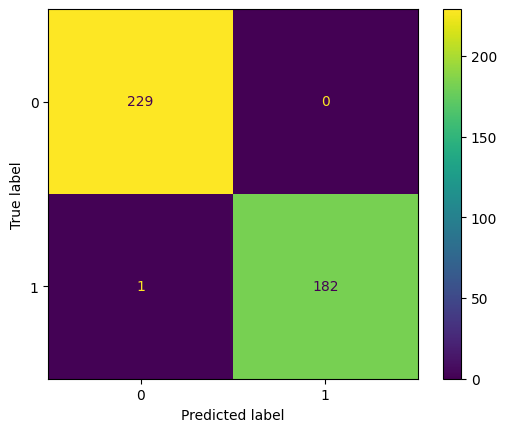

In [32]:
# Display confusion matrix
ConfusionMatrixDisplay.from_estimator(pipeline_rf_bn, X_test_bn, y_test_bn, cmap="viridis")
plt.show()

### Conclusion
The Random Forest model effectively distinguishes between genuine and forged banknotes, achieving high accuracy and robust performance across metrics. The model’s success suggests it is well-suited for this binary classification task, providing reliable results for banknote authentication.